# Анализ рынка заведений общественного питания Москвы

*Цель проекта* - провести исследование рынка общественного питания города Москвы и рассмотреть возможность открытия оригинального кафе, где гостей обслуживают роботы. В связи с тем, что проект многообещающий, но дорогой, было решено обратиться к инвесторам. Инвесторов интересует текущее положение дел на рынке — сможет ли наше кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов.

*Основные задачи проекта:*
- Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
- Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
- Ответить на вопрос, для какого вида объекта общественного питания характерно сетевое распространение?
- Ответить на вопрос, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить соответсвующие графики.
- Выделить в датафрейме отдельный столбец с информацией об улице из столбца address .
- Построить график топ-10 улиц по количеству объектов общественного питания. С помощью  внешней информации  ответить на вопрос — в каких районах Москвы находятся эти улицы?
- Найти число улиц с одним объектом общественного питания. С помощью  внешней информации  ответить на вопрос — в каких районах Москвы находятся эти улицы?
- Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

*Результаты исследования необходимо оформить в виде презентации для потенциальных инвстровов.*

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
import plotly.express as px
from plotly import graph_objects as go

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.set_palette(palette='tab10')
sns.set(style='whitegrid')
sns.color_palette('tab10')

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.info()
print()
print('Количество явных дубликатов в датасете ', df.duplicated().sum())
print()
print('Проверка на пропуски:')
display(df.isna().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB

Количество явных дубликатов в датасете  0

Проверка на пропуски:


id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Всего имеем данные о 15366  предприятий общественного питания в г.Москва.

Хорошо, в исходном датасете нет пропущенных значений, отсутсвуют явные дубликаты.

Есть необходимость исправить значения столбца `chain` на более уместные логические, переименовать столбец  `number` в более понятное название, а так же сделать наименования типов заведения  `предприятие быстрого обслуживания` и `магазин (отдел кулинарии)` более короткими для лучшего их отображения на графиках.

In [5]:
df = df.rename(columns ={'number': 'seats'}) #замена названия столбца 

df['chain'] = df['chain'].replace(['да', 'нет'], [True, False]) #замена на логические значения 

# сократим названия
df['object_type'] = df['object_type'].replace(
    ['предприятие быстрого обслуживания', 'магазин (отдел кулинарии)'], 
    ['фаст-фуд','кулинария']
)

In [6]:
df.head()

,id,object_name,chain,object_type,address,seats
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Имеются "ошибки" в наименованиях заведений, например кафе Шоколадница записано под разными наименованиям: ШОКОЛАДНИЦА, Шоколадница, Кафе «Шоколадница» и т.д. Пока не ясно, насколько это скажется для целей нашего исследования и как повлияет на результаты, но пока оставим в данном виде.


Предобработка данных завершена, переходим к основным вопросам исследования.


In [7]:
print('Количество дубликатов после исключения столбца id из рассмотрения', df[['object_name', 'chain', 'object_type', 'address', 'seats']].duplicated().sum())

index_for_drop = df[df[['object_name', 'chain', 'object_type', 'address', 'seats']].duplicated()].index

df = df.drop(index = index_for_drop).reset_index(drop=True)

print('Количество строк в датафрейме после удаления дубликатов', df.shape[0])

Количество дубликатов после исключения столбца id из рассмотрения 82
Количество строк в датафрейме после удаления дубликатов 15284


In [8]:
df.head()

,id,object_name,chain,object_type,address,seats
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


## Исследование соотношения видов объектов общественного питания по количеству

In [9]:
object_type = df['object_type'].value_counts()
object_type

кафе          6071
столовая      2584
ресторан      2282
фаст-фуд      1898
бар            855
буфет          577
кафетерий      395
закусочная     349
кулинария      273
Name: object_type, dtype: int64

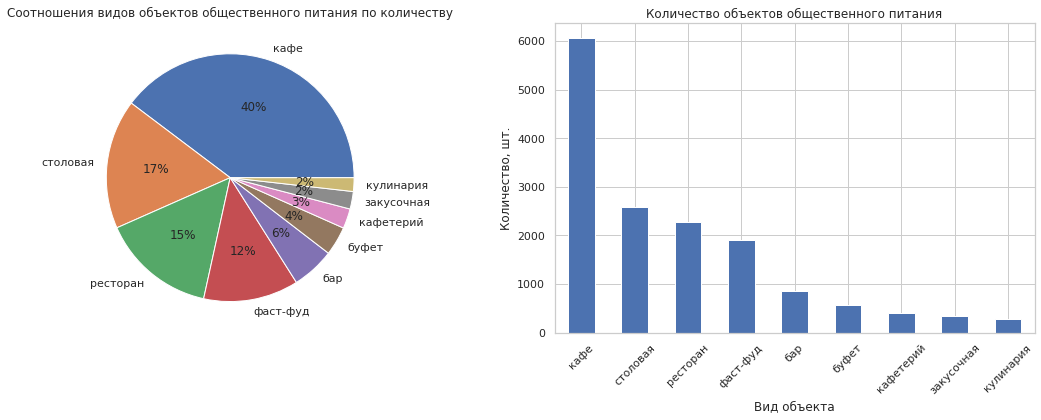

In [10]:
ax1 = plt.subplot(1, 2, 1)
object_type.plot(
    kind="pie",
    autopct='%.0f%%',
    #colors=colors,
    title = 'Cоотношения видов объектов общественного питания по количеству',
    label =' ',
    ax = ax1)

ax2 = plt.subplot(1, 2, 2)
object_type.plot(
    kind="bar",
    title = 'Количество объектов общественного питания',
    grid= True,
    ax = ax2,
    figsize=(15, 6))
plt.xlabel('Вид объекта')
plt.ylabel('Количество, шт.')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Самые популярные форматы заведений: 
 1) Кафе (40% от доли рынка, 6071 заведений);
 
 2) Столовые (17% от доли рынка, 2584 заведений);
 
 3) Рестораны (2282 заведений или 15% от доли рынка);
 
 4) Предприятия быстрого питания (1898 заведений / 13% доли рынка). 
    
    
На долю баров, буфетов кафетерий, закусочных и кулинарий в совокупности приходится 17% от рынка, но процент каждого из данных видов заведений на рынке не велик.

## Исследование соотношения сетевых и несетевых заведений по количеству

Соотношение сетевых и несетевых заведений по количеству:


,index,chain
0,False,0.806072
1,True,0.193928


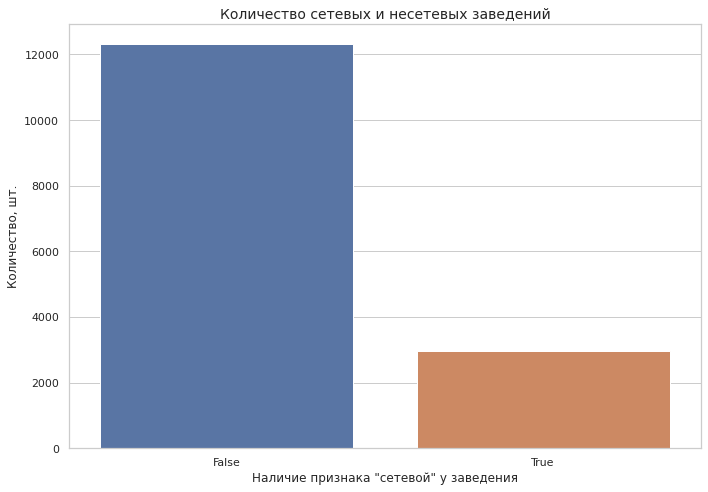

In [11]:
print("Соотношение сетевых и несетевых заведений по количеству:")
display (df['chain'].value_counts(normalize=True).reset_index())

plt.figure(figsize=(10,7))
plt.title ("Количество сетевых и несетевых заведений", fontsize=14)
sns.countplot(df['chain'])
plt.xlabel('Наличие признака "сетевой" у заведения')
plt.ylabel('Количество, шт.')
plt.tight_layout()
plt.show()

Большинство предприятий на рынке - несетевые, 80% от общего числа. Сетевых предприятий на рынке общественного питания в 5 раз меньше, чем несетевых.

## Для какого вида объектов общественного питания характерно сетевое распространение?

In [12]:
chain_table = df.pivot_table(
    index = 'object_type',
    values ='chain',
    aggfunc = 'mean' 
).sort_values(
    by ='chain',
    ascending =False
).reset_index()

chain_table.columns =['object_type', 'share_of_chain']
chain_table['share_of_chain'] = round(chain_table['share_of_chain']*100, 2)

chain_table

,object_type,share_of_chain
0,фаст-фуд,41.52
1,кулинария,28.57
2,ресторан,23.79
3,кафе,22.99
4,закусочная,16.05
5,кафетерий,13.16
6,бар,4.33
7,буфет,1.91
8,столовая,0.12


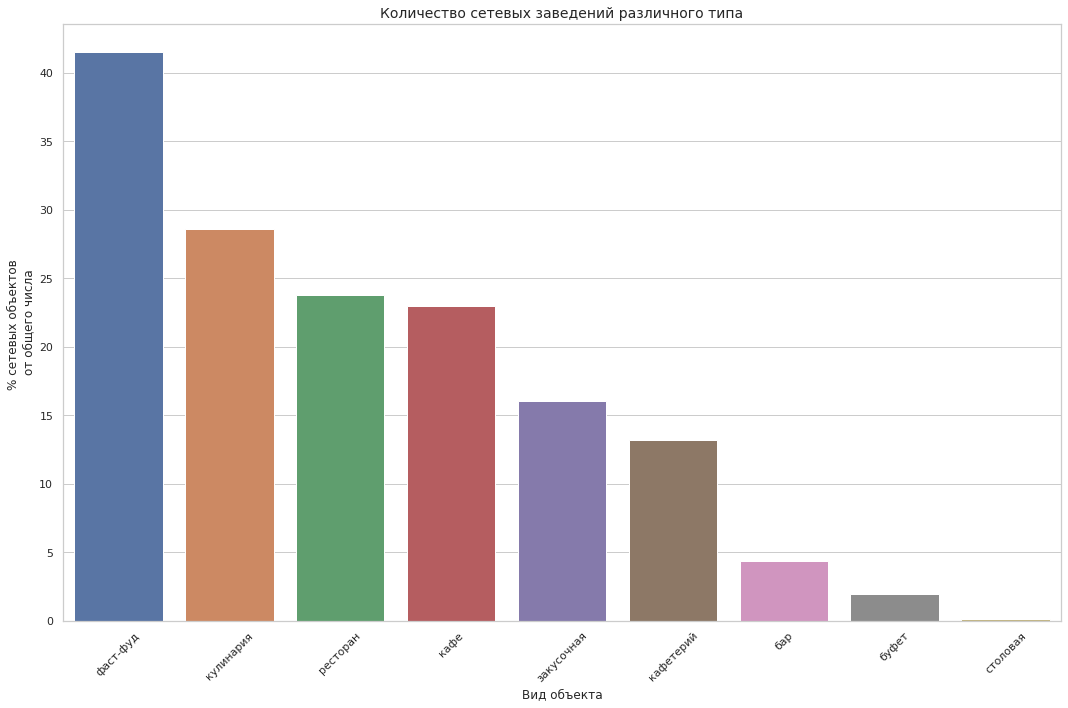

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(data = chain_table, x = 'object_type', y = 'share_of_chain' )

plt.title ("Количество сетевых заведений различного типа", fontsize=14)
plt.xlabel('Вид объекта')
plt.ylabel('% сетевых объектов \nот общего числа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Исследование рынка сетевых объектов общественного питания показали, что наибольшее число сетевых заведений имеют предприятия фаст-фуда или иначе быстрого питания - 41% от общего числа заведений данного типа. Далее следуют кулинарии с 28 % числа сетевых заведений, рестораны и кафе с приблизительно 23% сетевых заведений от общего числа заведений данного типа. Практически нет сетевого развития у баров и буфетов - менее 5%. А встретить сетевую столовую огромная редкость - всего лишь 0,12% столовых являются сетевыми. 

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?


In [14]:
chain_df=df.query('chain == True')

chain_df.describe()['seats']


count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: seats, dtype: float64

Медианное значение мест в сетевых заведений равно 40, среднее - 53 места. Видим большое максимальное значение посадочных мест - 580 шт и высокое значение стандартного среднеквадратичного отклонения количества мест внутри выборки - 57,14. Последний параметр говорит нам о большом разбросе рассматриваемого параметра и как следствие. Отобразим распределение количества мест в заведениях Москвы на гистограмме.

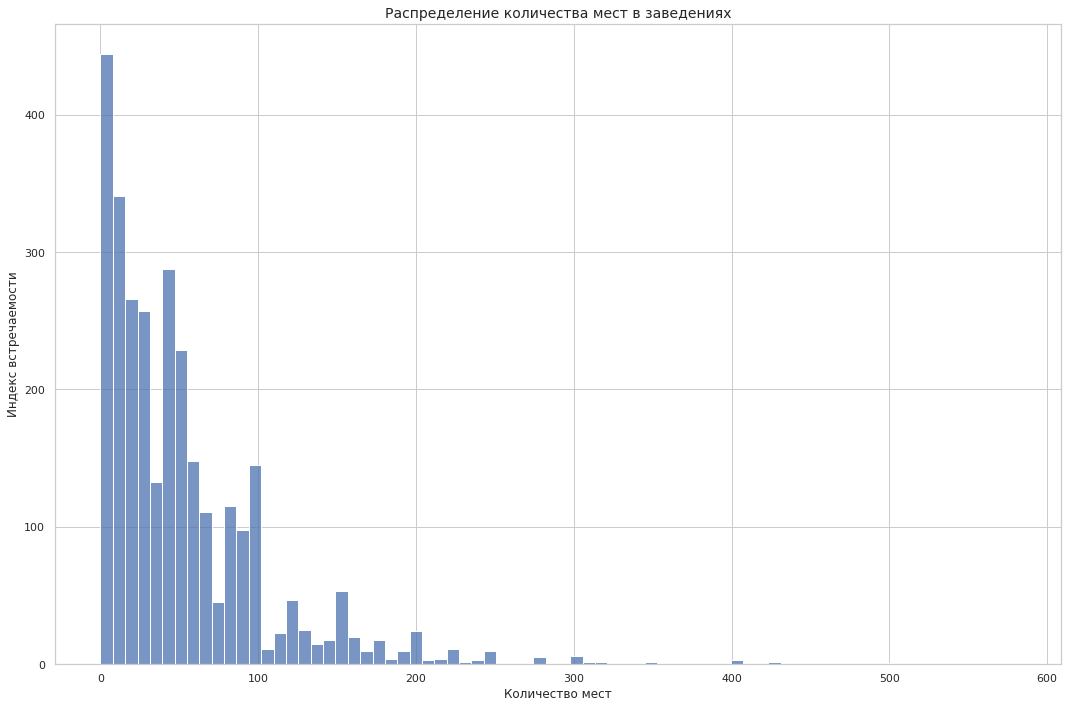

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(chain_df['seats'])
plt.title ("Распределение количества мест в заведениях", fontsize=14)
plt.xlabel('Количество мест')
plt.ylabel('Индекс встречаемости')
plt.tight_layout()
plt.show()

Самая большая группа заведений - без посадочных мест, почти 450 наблюдений. Очевидно, что это предприятия формата еды на вынос- фудтраки, ларьки и т.д. 

Хорошо виден всплеск числа заведений с 40-50 числом посадочных мест, около 1000 наблюдений у данной совокупности.
На гистограмме хорошо видно, как сильно снижается количество предприятий общественного питания после 100 посадочных мест, а после 200 график начинает нести в себе стихийный характер распределения и свидетельствует о "выбросах" в данных. Убедимся в наших предположениях о размере статистически значимом размере числа мест в заведениях Москвы на диаграмме размаха. 

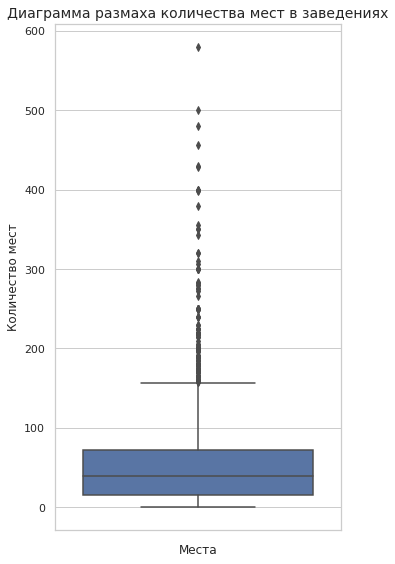

In [16]:
plt.figure(figsize=(5,8))
sns.boxplot(data = chain_df, y ='seats')
plt.title ("Диаграмма размаха количества мест в заведениях", fontsize=14)
plt.ylabel('Количество мест')
plt.xlabel('Места')
plt.tight_layout()
plt.show()


Как и предполагалось ранее,  края статистически значимой выборки находятся в диапазоне от 0 до 150 посадочных мест, далее плотным рядом идут выбросы данных. 25,75,50 персентили отмеченные ранее  в начале исследования - на своих местах. Еще раз отметим, что среднее медианное значение количества мест в рассматриваемых данных - 40.

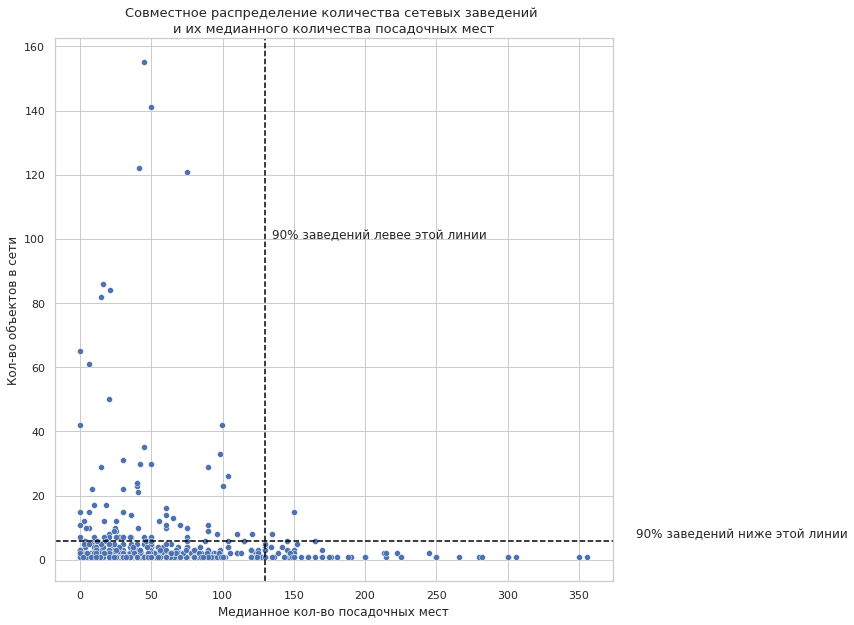

In [17]:
chain_objects = chain_df.groupby('object_name').agg({'object_name':'count', 'seats':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.figure(figsize=(10,10))
sns.scatterplot(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()

In [18]:
print('В 90% сетей не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 90)) , int(np.percentile(chain_objects['objects'], 90))))


В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем


Итак, общий однозначный вывод по данному разделу сделать сложно. Средние значения числа мест в сетевых заведениях (40) должно подталкивать на мысль, что в Москве более характерно открытие многих сетевых заведений с небольшим числом посадочных мест в каждом.

Однако, если присмотреться к диаграмме рассеивания повнимательней, то можно сделать вывод о том, что в, что 90% сетей укладываются в 6 заведений в среднем, что тоже, согласитесь, не много. 

Поэтому сделаю следующий вывод: среднее количество мест в сетевых заведениях будет зависеть от типа заведений сети, а не от наличия статуса "сетевой". Но в любом случае маленькие "сетки" более распространены.

## Исследование среднего количества посадочных мест в зависимости от вида заведения

In [19]:
chain_pt= df.pivot_table (index = 'object_type',
                      values = ['id','seats'],
                      #columns = ['object_name', 'number'],
                      aggfunc ={'id':'count', 
                               'seats':['sum','median']},
                     #margins=True
                     ).reset_index()
chain_pt.columns = ['object_type','type_sum', 'median_of_seats', 'sum_of_seats']
chain_pt = chain_pt.sort_values(by = 'median_of_seats', ascending = False)
chain_pt

,object_type,type_sum,median_of_seats,sum_of_seats
7,столовая,2584,103,336793
6,ресторан,2282,80,221091
0,бар,855,35,37221
1,буфет,577,32,29721
3,кафе,6071,30,241539
4,кафетерий,395,6,3628
8,фаст-фуд,1898,6,39494
2,закусочная,349,0,2731
5,кулинария,273,0,1526


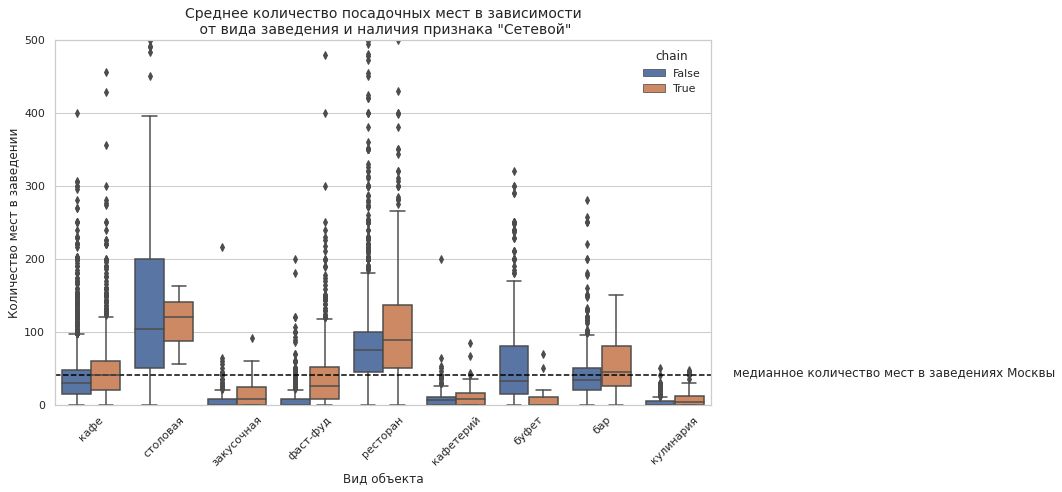

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(x='object_type', y='seats', data=df, hue = 'chain')
plt.ylim((0, 500))
plt.axhline(df['seats'].median(), linestyle='--', color='black')
plt.text(8.8, df['seats'].median(), 'медианное количество мест в заведениях Москвы')
plt.title ('Среднее количество посадочных мест в зависимости\n от вида заведения и наличия признака "Сетевой"', fontsize=14)
plt.xlabel('Вид объекта')
plt.ylabel('Количество мест в заведении')
plt.xticks(rotation=45)
plt.tight_layout()

Топ-3 видов заведений по среднему количеству мест (без учета на разделение на сетевые и несетевые заведения):

1) Столовые, в среднем 103 посадочных места;

2) Рестораны - 80 посадочных места;

3) Бары - 35 посадочных места.
    
Впечатляет разрыв между 2 и 3 местом нашего рейтинга, более чем в 2 раза. 

Анализ среднего количества посадочных мест в зависимости от вида заведения и наличия признака "Сетевой" показал, что в сетевых кафе больше максимальное число посадочных мест и их среднее число на заведение, аналогичная ситуация в типах заведений закусочная, фаст-фуд, ресторан, кафетерий, кулинария. 
Очень примечатлен разрыв в максимальном числе мест и их медианном значении в секторе предприятий общественного питания "фаст-фуд", причем в несколько десятков раз. Очевидно, что это сказывается присутсвие таких сетей как Макдональдс, KFC и т.д. В этой категории им нет равных по данному показателю с прочими несетевыми объектами.
Аналогичная ситуация и по медианному значению количества мест и их максимального числа в ресторанах. В сетевых ресторанах почти на 100 посадочных мест больше, а среднее значение на 10 выше.

В группе "столовые" и "буфеты" ситуация диаметрально противоположна категории "фаст-фуд". Очевидно, что сетевые столовые и буфеты имеют строго определенный формат по количеству мест в заведениях, т.к. практически отсутствуют выбросы по количеству мест на заведение, и сам разброс числа мест выглядит более компактно и осмысленно. Однако отметим, что несетевые столовые и буфеты в 2,5-3 раза имеют выше максимальное количество мест. 


## Добавление в датасет информации об улице заведения и информации о районе

In [21]:
# соберем список типовых названий улиц
street_types=['улица','бульвар','проезд','шоссе','переулок','проспект',
     'площадь','квартал', 'набережная','Автодороги','линия','аллея','тупик']

# c помощью функции сплит и поиска внутри строк найдем по ключевым словам совпаденя и сохраним их
def street_from_address(address):
    for part_of_address in address.split(', '):
        for street_type in street_types:
            if part_of_address.lower().find(street_type)!= -1:
                return part_of_address

df['street'] = df['address'].apply(street_from_address)

print("Количеcтсво заведений без явного названия улицы в адресе после приобразования:", df['street'].isna().sum())

display(df[df['street'].isna()].head())

df = df.dropna(subset=['street'])


Количеcтсво заведений без явного названия улицы в адресе после приобразования: 381


,id,object_name,chain,object_type,address,seats,street
1405,20199,ЭТО,False,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1406,68113,Френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1407,20105,Кафе «Граф Монте-Кристо»,False,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1408,22982,Альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1409,151267,Альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",45,None


Не удалось указать адрес для 381 предприятия общественного питания, что составляет 2,5% от начального датасета. Это заведения, в адресах которых явно не указаны наименования адресов, например в г. Зеленограде ряд кафе имеет только корпус в столбце адрес. Т.к. доля таких заведений не существенна в нашем исследовании, строки с подобными данными можно удалить.

## Топ-10 улиц по количеству объектов общественного питания

In [22]:
# Подгрузим наше исследование дополнительные данные о соответсвии адресов им районов с сайта Мосгаза
from io import BytesIO
import requests

spreadsheet_id = '13m6TnAblptrMSfKgY0gICCDI6K5cxUg355lmbQhI68M'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

data_street= pd.read_csv(BytesIO(r.content))
data_street.head(10)


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район
6,Большая Грузинская улица,17,ЦАО,Пресненский район
7,Малая Грузинская улица,17,ЦАО,Пресненский район
8,Грузинская площадь,17,ЦАО,Пресненский район
9,улица Грузинский Вал,17,ЦАО,Пресненский район


Имеется проблема - крупные улицы проходят по нескольким районам. Сгруппируем улицы и добавим им сгруппированные значения администратиных округов и районов

In [23]:
street_group = (data_street.groupby('streetname')
         [['okrug','area']]
         .apply(lambda x: tuple(x.values))
         .reset_index(name='area'))
street_group.columns=['street', 'area']

In [24]:
street_group.head(10)

,street,area
0,1-й Автозаводский проезд,"([ЮАО, Даниловский район],)"
1,1-й Амбулаторный проезд,"([САО, Район Аэропорт],)"
2,1-й Архивный переулок,"([ЦАО, Район Хамовники],)"
3,1-й Бабьегородский переулок,"([ЦАО, Район Якиманка],)"
4,1-й Балтийский переулок,"([САО, Район Аэропорт],)"
5,1-й Басманный переулок,"([ЦАО, Басманный район], [ЦАО, Красносельский район])"
6,1-й Белокаменный проезд,"([ВАО, Район Богородское],)"
7,1-й Богучарский переулок,"([ЮЗАО, Район Южное Бутово],)"
8,1-й Ботанический проезд,"([СВАО, Район Свиблово],)"
9,1-й Боткинский проезд,"([САО, Район Беговой],)"


In [25]:
df = df.merge(street_group, on='street', how = "left")

In [26]:
print("Количеcтсво заведений для которых не удалось определить район -", df['area'].isna().sum())

df.head()

Количеcтсво заведений для которых не удалось определить район - 408


,id,object_name,chain,object_type,address,seats,street,area
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,"([СВАО, Ярославский Район],)"
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,"([ЦАО, Таганский район], [ЮВАО, Нижегородский район], [ЮЗАО, Район Южное Бутово])"
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,"([ЦАО, Таганский район],)"
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,"([СВАО, Район Лианозово],)"
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,"([СВАО, Район Лианозово],)"


Для 408 улиц не удалось подгрузить значения района. Посмотрим внимательнее на данные строки.

In [27]:
display(df[df['area'].isna()].head())

,id,object_name,chain,object_type,address,seats,street,area
1451,106204,КАФЕ «ШАШЛЫЧОК»,False,кафе,"город Москва, 3-й Митинский переулок, дом 1",44,3-й Митинский переулок,NaN
1654,25308,Ани,False,кафе,"город Москва, улица Руднёвка, дом 14",32,улица Руднёвка,NaN
1679,156219,Пицца лэнд,False,фаст-фуд,"город Москва, проспект Защитников Москвы, дом 14",20,проспект Защитников Москвы,NaN
1726,69842,Чайхона №1,True,ресторан,"город Москва, улица Мичуринский Проспект, Олимпийская Деревня, дом 1, корпус 1",94,улица Мичуринский Проспект,NaN
1831,128021,Кафе «Мама МИА»,False,кафе,"город Москва, поселение Внуковское, улица Лётчика Ульянина, дом 2",12,улица Лётчика Ульянина,NaN


In [28]:
display(street_group[street_group['street'].str.contains("Митинский")])
display(street_group[street_group['street'].str.contains("Защитников")])
display(street_group[street_group['street'].str.contains("Руднёвка")])

,street,area
68,1-й Митинский переулок,"([СЗАО, Район Митино],)"
286,2-й Митинский переулок,"([СЗАО, Район Митино],)"
441,3-й Митинский проезд,"([СЗАО, Район Митино],)"


,street,area
2869,площадь Защитников Неба,"([ЗАО, Район Крылатское],)"


,street,area


Очевидно, что данные, которые имеются в отрытом доступе, например на сайте Мосгаза, не содержат в себе исчерпывающий перечень адресов.   3-й Митинский переулок есть в списке кафе, но его нет у Мосгаза, есть только 3-й Митинский проезд. Вместо проспект Защитников Москвы есть только площадь Защитников Неба. Данные о улице Рудневка вообще отсутствуют. Однако, более качественный источник данных о улицах и районах Москвы в открытом доступе найти не удалось. Посмотрим, как повлияют пропуски в последующем исследовании, возможно отсутствие данных будет не критично.

In [29]:
top_10_street = df.groupby('street').agg({'street':'count','area':'first'})
top_10_street.columns=['сatering_sum','area']
top_10_street = top_10_street.reset_index()
top_10_street = top_10_street.sort_values(by='сatering_sum', ascending = False).head(10)
top_10_street

,street,сatering_sum,area
1425,проспект Мира,204,"([СВАО, Алексеевский район], [СВАО, Ярославский Район], [СВАО, Район Марьина роща], [СВАО, Останкинский район], [СВАО, Район Ростокино], [СВАО, Район Свиблово], [ЦАО, Мещанский район])"
1014,Профсоюзная улица,182,"([ЮЗАО, Академический район], [ЮЗАО, Район Черемушки], [ЮЗАО, Район Ясенево], [ЮЗАО, Район Коньково], [ЮЗАО, Обручевский район], [ЮЗАО, Район Теплый Стан])"
686,Ленинградский проспект,172,"([САО, Район Аэропорт], [САО, Район Беговой], [САО, Хорошевский район], [САО, Район Сокол])"
997,Пресненская набережная,167,"([ЦАО, Пресненский район],)"
399,Варшавское шоссе,165,"([ЮАО, Район Чертаново Центральное], [ЮАО, Район Чертаново Северное], [ЮАО, Район Чертаново Южное], [ЮАО, Донской район], [ЮАО, Район Нагатино-Садовники], [ЮАО, Нагорный район], [ЮЗАО, Район Северное Бутово], [ЮЗАО, Район Южное Бутово])"
689,Ленинский проспект,148,"([ЗАО, Район Проспект Вернадского], [ЗАО, Район Тропарево-Никулино], [ЮАО, Донской район], [ЮЗАО, Район Гагаринский], [ЮЗАО, Ломоносовский район], [ЮЗАО, Обручевский район], [ЮЗАО, Район Теплый Стан], [ЦАО, Район Якиманка])"
1421,проспект Вернадского,128,"([ЗАО, Район Проспект Вернадского], [ЗАО, Район Раменки], [ЗАО, Район Тропарево-Никулино], [ЮЗАО, Район Гагаринский], [ЮЗАО, Ломоносовский район])"
676,Кутузовский проспект,114,"([ЗАО, Район Дорогомилово], [ЗАО, Район Фили-Давыдково])"
599,Каширское шоссе,111,"([ЮАО, Район Москворечье-Сабурово], [ЮАО, Район Нагатино-Садовники], [ЮАО, Район Орехово-Борисово Южное], [ЮАО, Район Орехово-Борисово Северное])"
606,Кировоградская улица,108,"([ЮАО, Район Чертаново Центральное], [ЮАО, Район Чертаново Северное], [ЮАО, Район Чертаново Южное])"


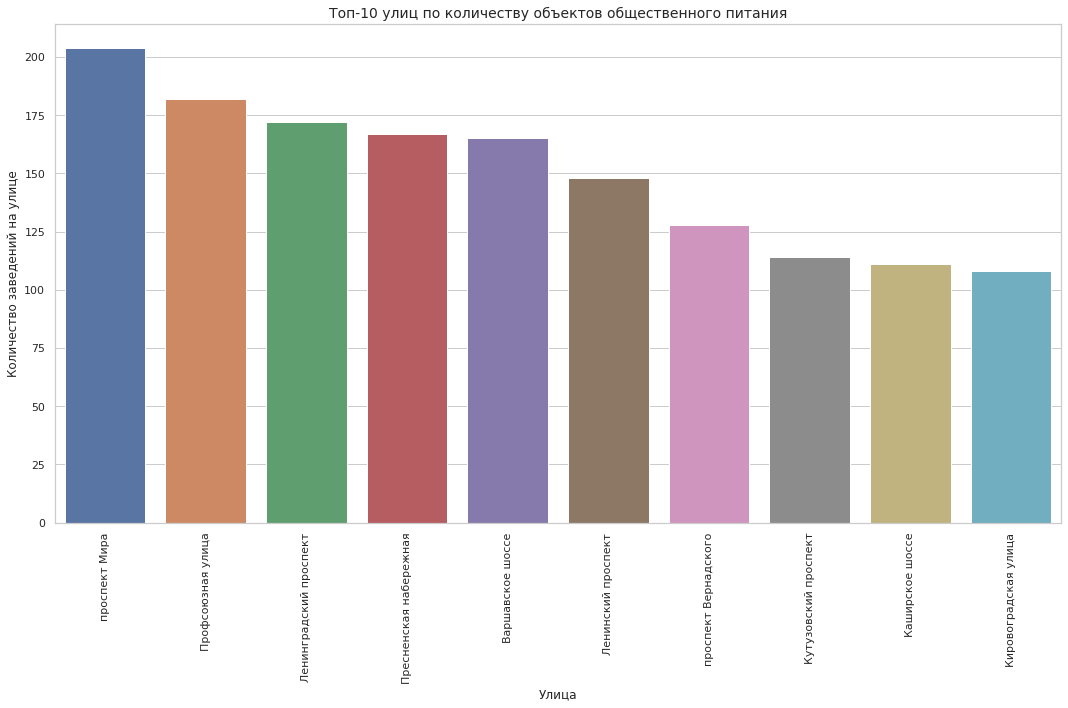

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data = top_10_street, y = 'сatering_sum', x = 'street' )
plt.title ("Топ-10 улиц по количеству объектов общественного питания", fontsize=14)
plt.ylabel('Количество заведений на улице')
plt.xlabel('Улица')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Разрыв между первым и последним местом в топ-10 улиц по количеству заведений общественного питания почти составил 100 шт. 

Все улицы с топ-10 числом заведений имеют большой размер и расположились в нескольких районах Москвы, а некоторые даже в нескольких административных округах (кроме Пресненской набережной, она целиком уместилась в 1 районе).
По количеству районов и административных округов, можно сделать вывод, о том что на юге и юго-западе Москвы больше расположено улиц с максимальным количеством объектов общественного питания.


## Поиск улиц с одним объектом общественного питания

Попробуем отойти от предыдущей сводной таблице с объединенными данными о улицах, районах и администратиных округах и немного сменим тактику. Соберем исходные данные об  улицах с одним объектом общественного питания и сгруппируем их по административным округам Москвы, воспользовавшись данными от Мосгаза, как словарем адресов.

In [31]:
only_1_object = df.groupby('street').agg({'street':'count'})
only_1_object.columns=['сatering_sum']
only_1_object = only_1_object.query('сatering_sum == 1')
only_1_object = only_1_object.reset_index()
only_1_object.head()

,street,сatering_sum
0,1-й Балтийский переулок,1
1,1-й Басманный переулок,1
2,1-й Ботанический проезд,1
3,1-й Вешняковский проезд,1
4,1-й Голутвинский переулок,1


In [32]:
print('Количество улиц с одним объектом общественного питания -', only_1_object.shape[0])

Количество улиц с одним объектом общественного питания - 551


In [33]:
only_1_object = only_1_object.merge(data_street[['streetname', 'okrug']], how = 'left', left_on='street', right_on='streetname')
only_1_object.head(10)

,street,сatering_sum,streetname,okrug
0,1-й Балтийский переулок,1,1-й Балтийский переулок,САО
1,1-й Басманный переулок,1,1-й Басманный переулок,ЦАО
2,1-й Басманный переулок,1,1-й Басманный переулок,ЦАО
3,1-й Ботанический проезд,1,1-й Ботанический проезд,СВАО
4,1-й Вешняковский проезд,1,1-й Вешняковский проезд,ЮВАО
5,1-й Голутвинский переулок,1,1-й Голутвинский переулок,ЦАО
6,1-й Заречный переулок,1,NaN,NaN
7,1-й Зачатьевский переулок,1,1-й Зачатьевский переулок,ЦАО
8,1-й Кирпичный переулок,1,1-й Кирпичный переулок,ВАО
9,1-й Кожевнический переулок,1,1-й Кожевнический переулок,ЮАО


Опять пропуски в значениях. Определим, критично ли для нас.

In [34]:
print('Количеcтсво улиц с 1 заведением, для которых не удалось определить административный округ -', only_1_object['okrug'].isna().sum())

Количеcтсво улиц с 1 заведением, для которых не удалось определить административный округ - 35


Почти по 6% данным отсутствует информация об административным округам. В ручную будет проблематично и нерационально отыскать недостающую информацию. Согласимся и примем отсутствие данных и продолжим исследование.

In [35]:
only_1_object_table = only_1_object.groupby(
    by='okrug',dropna=True
)['сatering_sum'].sum().sort_values(ascending = False).reset_index()

only_1_object_table['%']=round(only_1_object_table['сatering_sum']*100/only_1_object_table['сatering_sum'].sum(),2)
only_1_object_table

,okrug,сatering_sum,%
0,ЦАО,186,33.10
1,ВАО,67,11.92
2,СВАО,66,11.74
3,САО,55,9.79
4,ЮВАО,55,9.79
5,ЗАО,45,8.01
6,ЮАО,29,5.16
7,СЗАО,27,4.80
8,ЮЗАО,27,4.80
9,Зеленоград,5,0.89


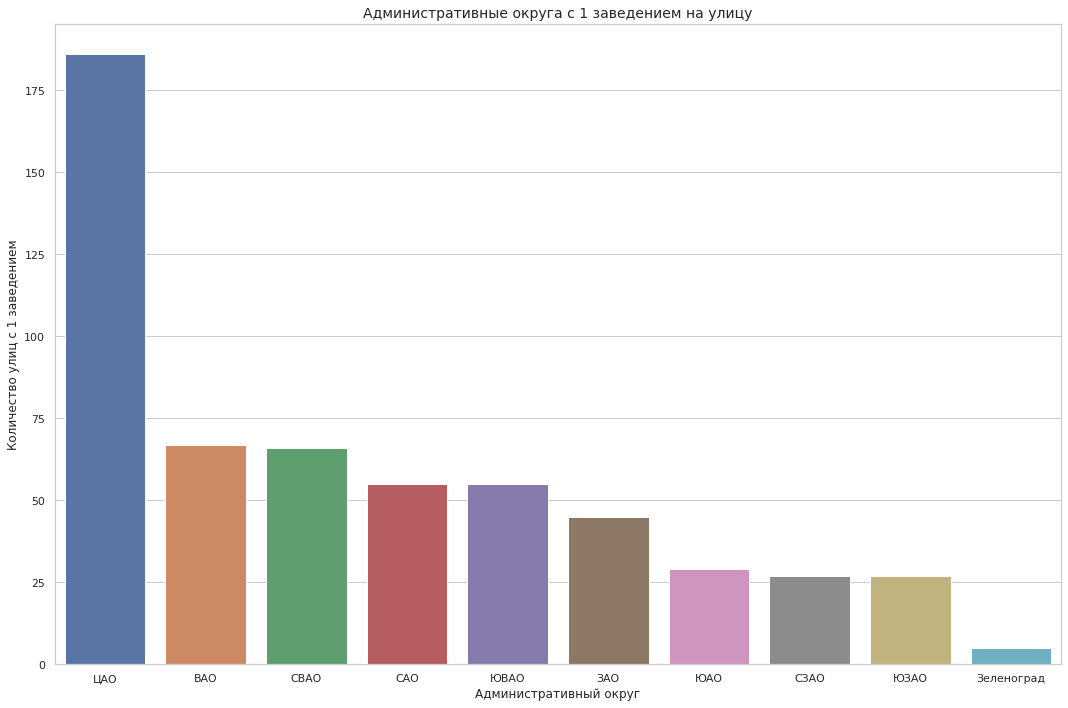

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(data = only_1_object_table,x = 'okrug', y = 'сatering_sum' )
plt.title ("Административные округа с 1 заведением на улицу", fontsize=14)
plt.ylabel('Количество улиц с 1 заведением')
plt.xlabel('Административный округ')

plt.tight_layout()
plt.show()

Количество улиц с одним объектом общественного питания - 551.

"Абсолютный"  округ-рекортсмен по количеству улиц с 1 заведением ЦАО - 186 заведения или 33%. 2-3 место делят между собой административные округа ВАО и СВАО, по 67 и 66 улиц и почти 12% соответственно. 4-5 место у САО и ЮВАО - по 55 улиц у каждого и или почти 10%.

## Общий вывод и рекомендации

Итак, подытожим наше исследование:

**Самые популярные форматы заведений:**

 1) Кафе (40% от доли рынка, 6071 заведений);

 2) Столовые (17% от доли рынка, 2584 заведений);

 3) Рестораны (2282 заведений или 15% от доли рынка);

 4) Предприятия быстрого питания (1898 заведений / 13% доли рынка).
    
    
На долю баров, буфетов кафетерий, закусочных и кулинарий в совокупности приходится 17% от рынка, но процент каждого из данных видов заведений на рынке не велик.


**Большинство предприятий на рынке - несетевые**, 80% от общего числа. Сетевых предприятий на рынке общественного питания в 5 раз меньше, чем несетевых.


**Исследование рынка сетевых объектов общественного питания** показали, что наибольшее число сетевых заведений имеют предприятия фаст-фуда или иначе быстрого питания - 41% от общего числа заведений данного типа. Далее следуют кулинарии с 28 % числа сетевых заведений, рестораны и кафе с приблизительно 23% сетевых заведений от общего числа заведений данного типа. Практически нет сетевого развития у баров и буфетов - менее 5%. А встретить сетевую столовую огромная редкость - всего лишь 0,12% столовых являются сетевыми. 

Медианное значение мест в сетевых заведениях равно 40, среднее - 53 места. Видим большое максимальное значение посадочных мест - 580 шт и высокое значение стандартного среднеквадратичного отклонения количества мест внутри выборки - 57,14. Последний параметр говорит нам о большом разбросе рассматриваемого параметра. 

Однозначный вывод о том, что более характерно для сетевых  заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест по имеющимся данным сделать сложно. Средние значения числа мест в сетевых заведениях (40) должно подталкивать на мысль, что в Москве более характерно открытие многих сетевых заведений с небольшим числом посадочных мест в каждом, в тоже время имеем данные, что 90% сетей укладываются в 6 заведений в среднем, что тоже, согласитесь, не много.

**Поэтому сделаю следующий вывод: среднее количество мест в сетевых заведениях будет зависеть от типа заведений сети, а не от наличия статуса "сетевой". Но в любом случае маленькие "сетки" более распространены.**



**Топ-10 улиц с наибольшим количеством заведений:**

- проспект Мира, 204 заведения.
- Профсоюзная улица, 183 заведения
- Ленинградский проспект, 173 заведения
- Пресненская набережная, 167 заведений
- Варшавское шоссе, 165 заведений
- Ленинский проспект, 148 заведений
- проспект Вернадского, 132 заведения
- Кутузовский проспект, 114 заведений
- Каширское шоссе, 112 заведений
- Кировоградская улица, 110 заведений

Все улицы в топ-10 с числом заведений имеют большой размер и расположились в нескольких районах Москвы, а некоторые даже в нескольких административных округах (кроме Пресненской набережной, она целиком уместилась в 1 районе).
По количеству районов и административных округов, можно сделать вывод, о том что на юге и юго-западе Москвы больше расположено улиц с максимальным количеством объектов общественного питания.

**Количество улиц с одним объектом общественного питания - 551**
"Абсолютный"  округ-рекортсмен по количеству улиц с 1 заведением ЦАО - 186 заведения или 33%. 2-3 место делят между собой административные округа ВАО и СВАО, по 67 и 66 улиц и почти 12% соответственно. 4-5 место у САО и ЮВАО - по 55 улиц у каждого и или почти 10%.


Согласно проведенного исследования, сделать однозначные рекомендации о виде заведения, количестве посадочных мест, а также районе расположения и дать комментарии по  возможность развития сети нельзя. В любом случае необходимо отталкиваться от более глубоких исследований и желаний учредителей. Необходимо однозначно определиться со сроком окупаемости инвестиций, общей возможной суммы инвестиций, провести маркетинговые исследования портрета потребителей и.д. Рассмотреть зарубежный опыт открытия подобных заведений.

Согласно проанализированным данным, наиболее перспективным видится открытие заведения в формате кафе с числом посадочных мест от 30 до 50 на одной из улиц из списка топ-10 по количеству заведений, так как логично предположить что на них хорошие показатели по проходимости. Такой подход позволит нам привлечь максимальный охват новых клиентов за счет новизны. Перспективы развития сети кафе данного формата мне видится, как маловероятная. Очевидно, что для того, чтобы составить конкуренцию имеющимся кафе, потребуются значительные капитальные вложения.

В случае склонности инвесторов к меньшим затратам и возможно (?) более быстрой окупаемости, то имеется возможность выбора иной стратегии, а именно выбор типа заведения — буфет, предприятия быстрого питания, кафетерия, кулинарии - объектов с не столь большими вложениями по причине небольшого числа посадочных мест, и расположение заведения среди списка улиц с минимальным количеством заведений общественного питания. 

Презентация: <https://drive.google.com/file/d/1OVhDR8g2dOgMthIOtkZYhDTlaYVzVo7h/view?usp=sharing>  